# Employee Turnover Prediction
Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.

[Source link](https://thecleverprogrammer.com/2020/07/12/employee-turnover-prediction/)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv("data/HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### dateset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### describing the dataset

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Visualizing the dataset

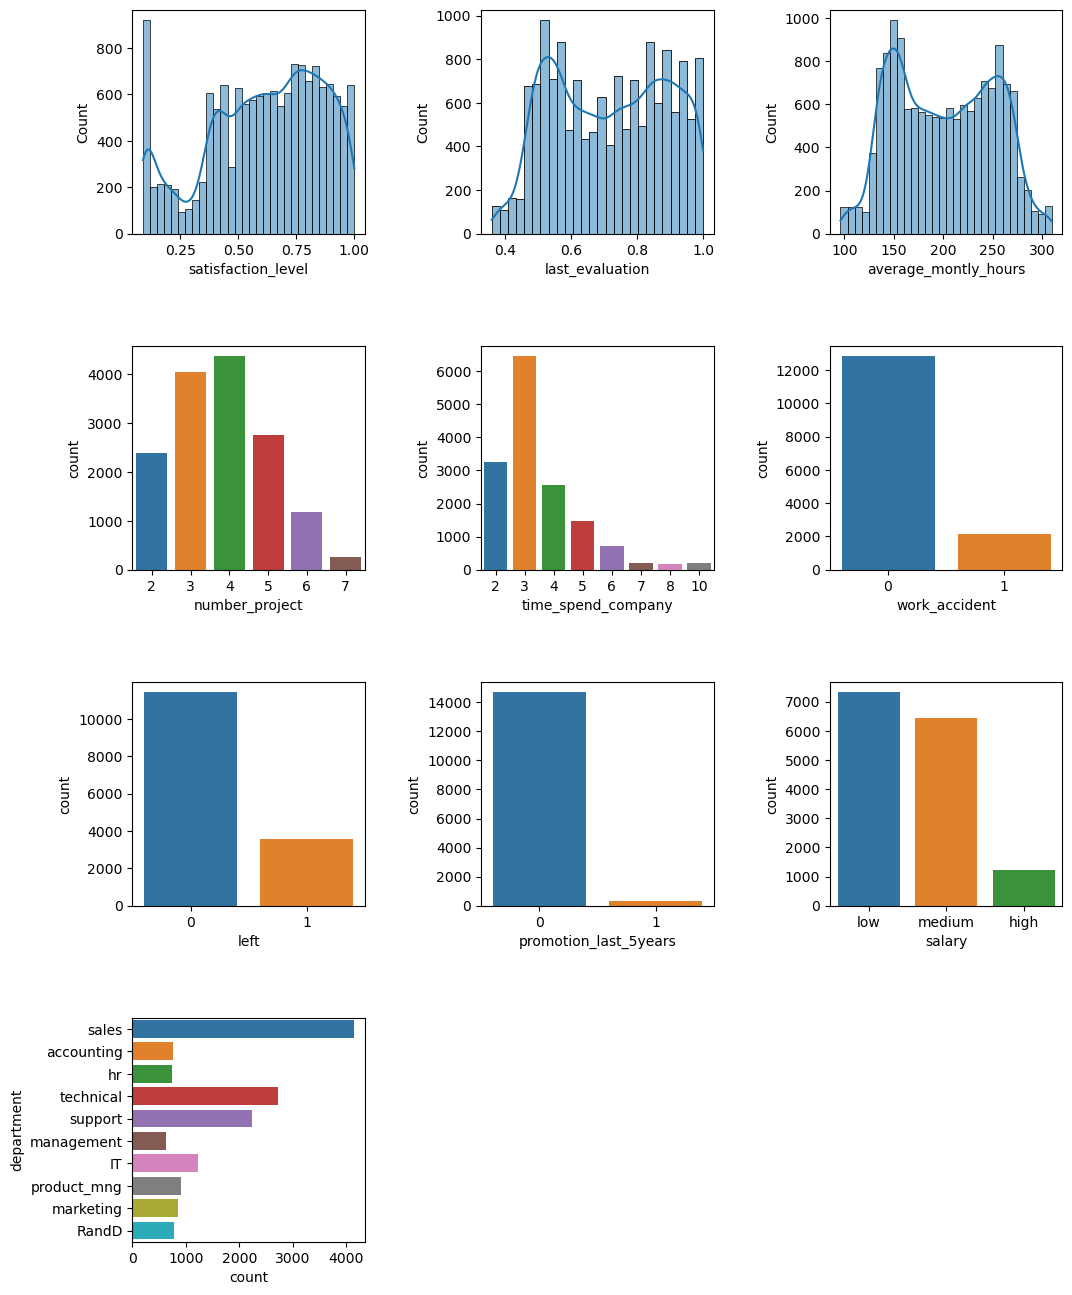

In [5]:
plt.figure(figsize=(12, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.columns[[0, 1, 3]]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df, x=column, kde=True)

for i, column in enumerate(df.columns[[2, 4, 5, 6, 7, 9]]):
    plt.subplot(4, 3, i+4)
    sns.countplot(df, x=column)

plt.subplot(4, 3, 10)
sns.countplot(df, y=df.columns[8]);

## Matrix of features and labels

In [6]:
X = df.drop(columns=["left"])
y = df["left"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (14999, 9)
y (14999,)


## Encoding categorical data

Converting two categorical variables to dummy variables, and removing the actual variables

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), [7, 8])],
    remainder="passthrough",
    verbose_feature_names_out=False,
)
X = ct.fit_transform(X)

print(f"X {X.shape}")
pd.DataFrame(X, columns=ct.get_feature_names_out()).head()

X (14999, 18)


,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (10499, 18)
X_test (4500, 18)
y_train (10499,)
y_test (4500,)


## Training the Random Forest Classification model

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Predicting the test set

In [10]:
y_pred = rf.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.98      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



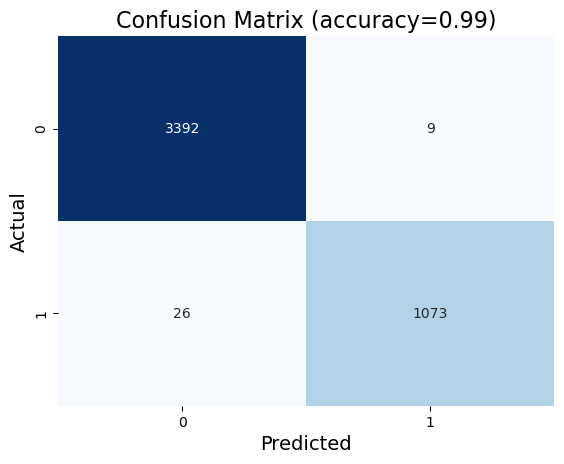

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Feature importance

In [12]:
feature_labels = ct.get_feature_names_out()
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance[::-1]:
    print(f"{feature_labels[index]:25}: {(importance[index] *100.0):.2f}%")

satisfaction_level       : 29.25%
number_project           : 19.37%
time_spend_company       : 18.35%
average_montly_hours     : 15.85%
last_evaluation          : 13.08%
work_accident            : 0.82%
salary_low               : 0.78%
salary_medium            : 0.40%
department_technical     : 0.38%
department_sales         : 0.34%
department_support       : 0.26%
promotion_last_5years    : 0.21%
department_accounting    : 0.19%
department_RandD         : 0.17%
department_hr            : 0.16%
department_management    : 0.16%
department_marketing     : 0.13%
department_product_mng   : 0.11%


## Live prediction

In [13]:
def live_prediction(inputs):
    column_names, columns_values = [], []
    for k, v in inputs.items():
        column_names.append(k)
        columns_values.append(v)
    columns_values = np.array(columns_values).reshape(1, -1)
    X_example = pd.DataFrame(columns_values, columns=column_names)
    X_example = ct.transform(X_example)
    prediction = rf.predict(X_example)
    if prediction[0] == 1:
        print("This employee will 'left' the company!")
    else:
        print("This employee will 'not left' the company!")

In [14]:
inputs = dict(
    satisfaction_level = 0.4,
    last_evaluation = 0.5,
    number_project = 2,
    average_montly_hours = 150,
    time_spend_company = 3,
    work_accident = 0,
    promotion_last_5years = 0,
    department = "sales",
    salary = "medium",
)
live_prediction(inputs)

This employee will 'left' the company!
